In [4]:
import pandas as pd
import numpy as np

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import time
from datetime import time as dt


In [6]:
df=pd.read_csv('Downloads/air/data_date4.csv')

In [7]:
df.head()

Date    Country                          Status  AQI Value
0  21/07/2022    Albania                            Good         14
1  21/07/2022    Algeria                        Moderate         65
2  21/07/2022    Andorra                        Moderate         55
3  21/07/2022     Angola  Unhealthy for Sensitive Groups        113
4  21/07/2022  Argentina                        Moderate         63

checking shape & size of dataset

In [8]:
df.shape

(13777, 4)

checking column names of dataset

In [9]:
df.columns

Index(['Date', 'Country', 'Status', 'AQI Value'], dtype='object')

checking unique value number in variables

In [10]:
df.nunique()

Date          90
Country      142
Status         6
AQI Value    307
dtype: int64

describing numerical columns of this dataset

In [11]:
df.describe()

AQI Value
count  13777.000000
mean      61.943384
std       48.974095
min        1.000000
25%       29.000000
50%       52.000000
75%       82.000000
max      963.000000

information about this dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13777 entries, 0 to 13776
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       13777 non-null  object
 1   Country    13777 non-null  object
 2   Status     13777 non-null  object
 3   AQI Value  13777 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 430.7+ KB


checking missing values in dataset

In [13]:
df.isnull().sum()

Date         0
Country      0
Status       0
AQI Value    0
dtype: int64

In [14]:
df.Country.unique()

array(['Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France',
       'French Guiana', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Gibraltar', 'Greece', 'Grenada', 'Guadeloupe', 'Guam',
       'Guatemala', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kosovo', 'Kuwait', 'Kyrgyzstan', 

changing name of two countries

In [15]:
df['Country']=df['Country'].replace({'United Kingdom of Great Britain and Northern Ireland':'United kingdom','United States of America':'USA'})

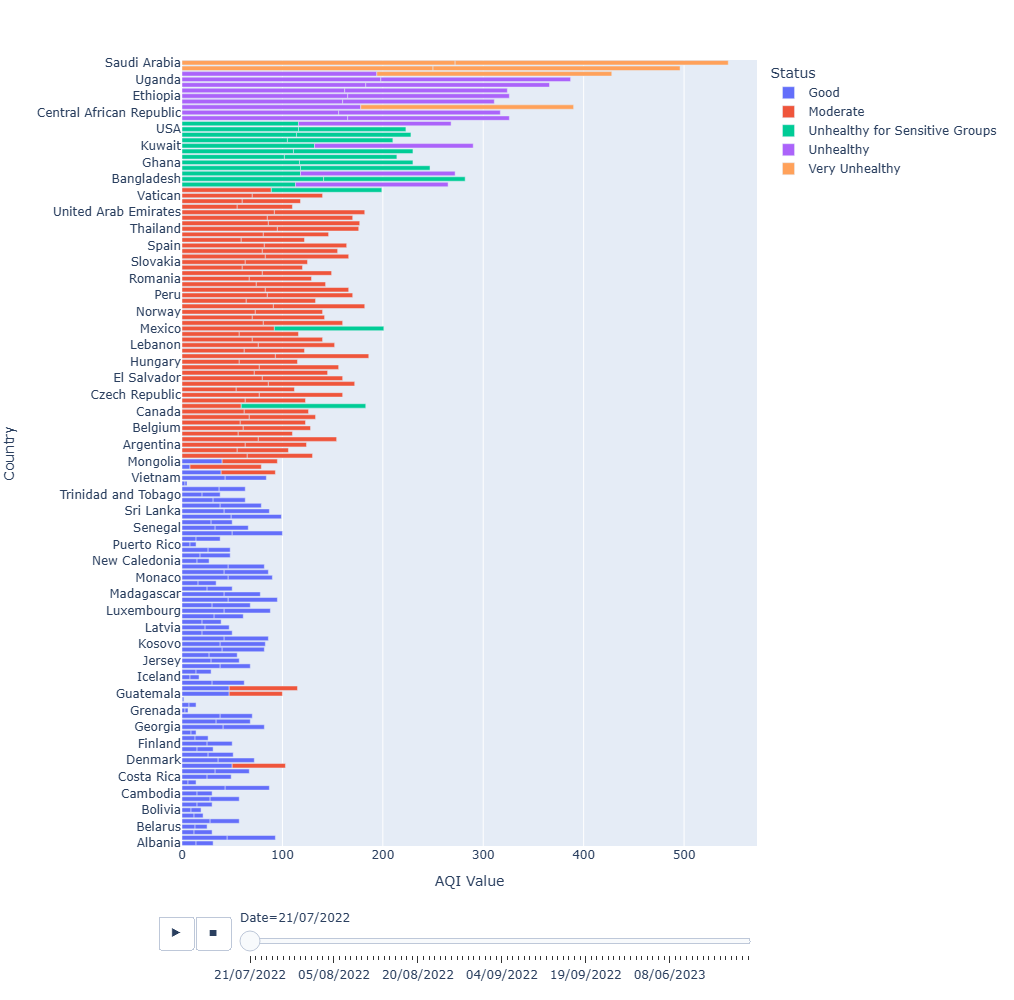

<Figure size 2000x2500 with 0 Axes>

In [16]:
plt.figure(figsize=(20,25))
px.bar(df, x='AQI Value', y='Country',color='Status',animation_frame='Date',width=1200,height=1000)

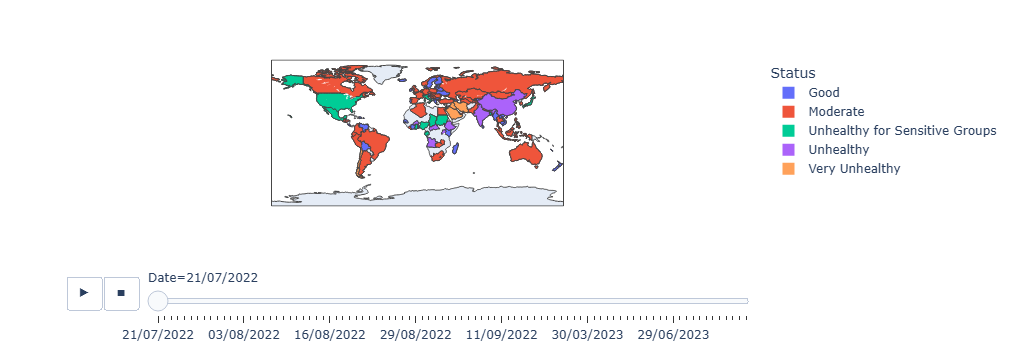

In [17]:
fig=px.choropleth(df,locations='Country',locationmode='country names',color='Status',animation_frame='Date',range_color=[25,450])
fig.show()

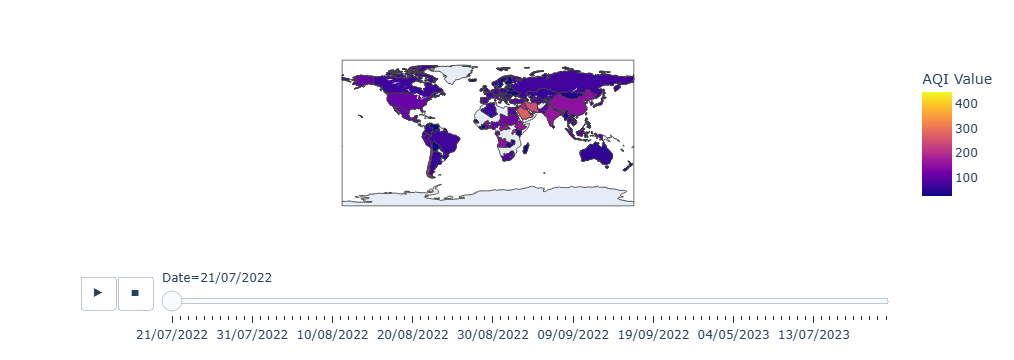

In [18]:
fig=px.choropleth(df,locations='Country',locationmode='country names',color='AQI Value',animation_frame='Date',range_color=[25,450])
fig.show()

Highest & lowest Aqi values of countries

In [19]:
df=df.set_index('Date')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13777 entries, 21/07/2022 to 04/07/2024
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    13777 non-null  object
 1   Status     13777 non-null  object
 2   AQI Value  13777 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 430.5+ KB


In [21]:
# top 10 countries with highest AQI value of yesterday
a= df.iloc[-141:,:].sort_values(ascending= False, by='AQI Value')[:10]

In [22]:
a

Country                          Status  AQI Value
Date                                                                       
04/07/2024                 India                       Hazardous        305
04/07/2024                 Chile                  Very Unhealthy        222
04/07/2024  United Arab Emirates                  Very Unhealthy        208
04/07/2024                Uganda                       Unhealthy        175
04/07/2024                   USA                       Unhealthy        161
04/07/2024                 Egypt                       Unhealthy        151
04/07/2024                 China  Unhealthy for Sensitive Groups        150
27/06/2024        United kingdom  Unhealthy for Sensitive Groups        147
04/07/2024             Indonesia  Unhealthy for Sensitive Groups        140
04/07/2024                Brazil  Unhealthy for Sensitive Groups        135

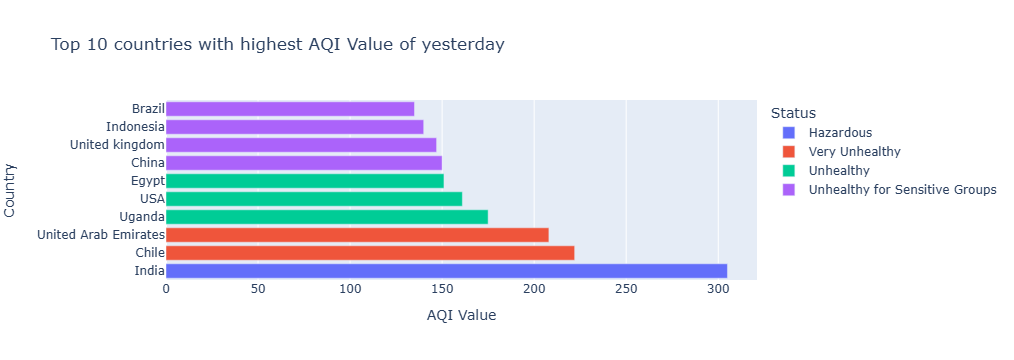

In [23]:
px.bar(a, x='AQI Value', y='Country',color='Status',title="Top 10 countries with highest AQI Value of yesterday")

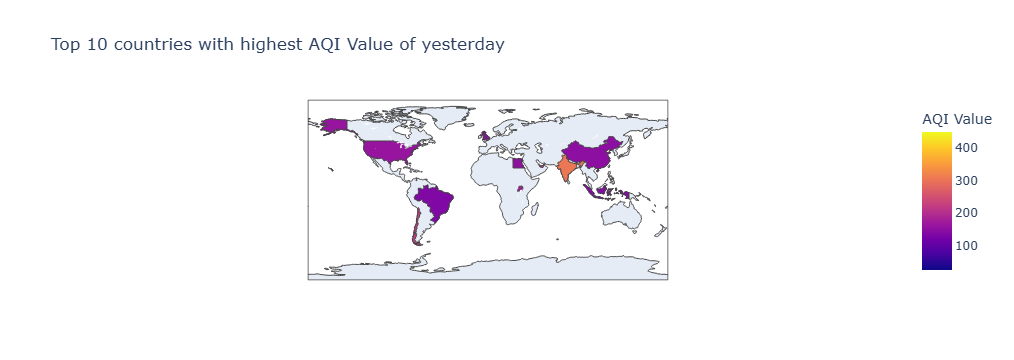

In [24]:
fig=px.choropleth(a,locations='Country',locationmode='country names',color='AQI Value',hover_name='Status',range_color=[25,450],title="Top 10 countries with highest AQI Value of yesterday")
fig.show()

In [25]:
#top 10 countries with lowest AQI value
b= df.iloc[-141:,:].sort_values(ascending= True, by='AQI Value')[:10]

In [26]:
b

Country Status  AQI Value
Date                                       
04/07/2024   Burkina Faso   Good          1
04/07/2024        Moldova   Good          2
04/07/2024  Liechtenstein   Good          6
04/07/2024        Andorra   Good          9
04/07/2024      Venezuela   Good         10
04/07/2024        Bermuda   Good         10
04/07/2024         Brunei   Good         10
04/07/2024        Denmark   Good         10
04/07/2024     Costa Rica   Good         12
04/07/2024        Senegal   Good         12

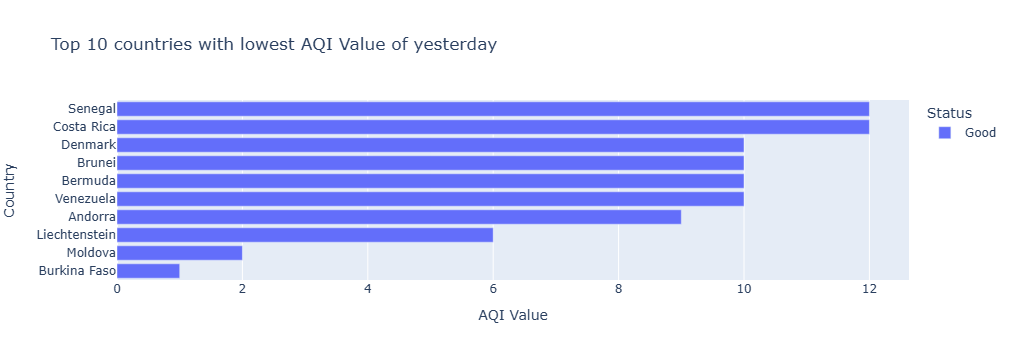

In [27]:
px.bar(b, x='AQI Value', y='Country',color='Status',title="Top 10 countries with lowest AQI Value of yesterday")

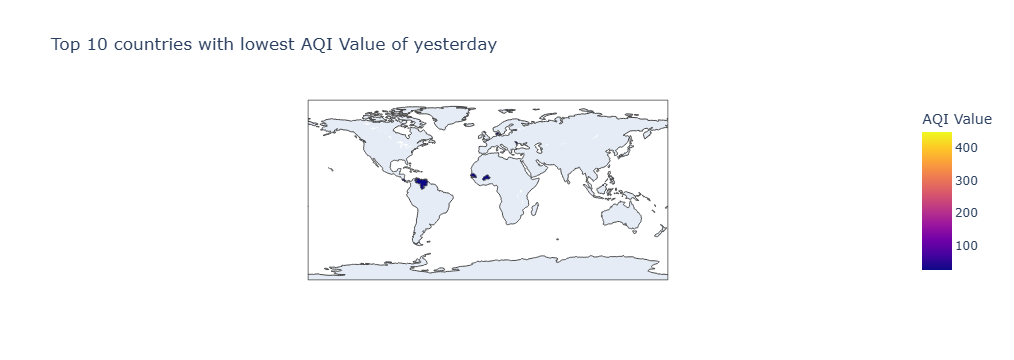

In [28]:
fig=px.choropleth(b,locations='Country',locationmode='country names',color='AQI Value',hover_name='Status',range_color=[25,450],title="Top 10 countries with lowest AQI Value of yesterday")
fig.show()

## Top 10 major countries of the world

In [29]:
major_countries=df[df['Country'].isin(['India','USA','China','Brazil','France','Russia','United kingdom','Japan','Germany','South Africa'])].reset_index()

In [30]:
major_countries

Date         Country                          Status  AQI Value
0    21/07/2022          Brazil                        Moderate         67
1    21/07/2022           China                       Unhealthy        160
2    21/07/2022          France                        Moderate         72
3    21/07/2022         Germany                        Moderate         77
4    21/07/2022           India                       Unhealthy        162
..          ...             ...                             ...        ...
985  04/07/2024           Japan  Unhealthy for Sensitive Groups        103
986  04/07/2024          Russia                        Moderate         81
987  04/07/2024    South Africa  Unhealthy for Sensitive Groups        123
988  04/07/2024  United kingdom                            Good         36
989  04/07/2024             USA                       Unhealthy        161

[990 rows x 4 columns]

In [35]:
import datetime as dt
major_countries["Date"]=pd.to_datetime(major_countries["Date"],format='%d%m%y')
major_countries["month"]=major_countries["Date"].dt.month
major_countries["day"]=major_countries["Date"].dt.day
major_countries["week"]=major_countries["Date"].dt.isocalendar().week

In [36]:
major_countries.head()

Date  Country     Status  AQI Value  month  day  wee  week
0 2022-07-21   Brazil   Moderate         67      7   21   29    29
1 2022-07-21    China  Unhealthy        160      7   21   29    29
2 2022-07-21   France   Moderate         72      7   21   29    29
3 2022-07-21  Germany   Moderate         77      7   21   29    29
4 2022-07-21    India  Unhealthy        162      7   21   29    29

In [37]:
major_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       990 non-null    datetime64[ns]
 1   Country    990 non-null    object        
 2   Status     990 non-null    object        
 3   AQI Value  990 non-null    int64         
 4   month      990 non-null    int32         
 5   day        990 non-null    int32         
 6   wee        990 non-null    UInt32        
 7   week       990 non-null    UInt32        
dtypes: UInt32(2), datetime64[ns](1), int32(2), int64(1), object(2)
memory usage: 48.5+ KB


## pie chart of major countries

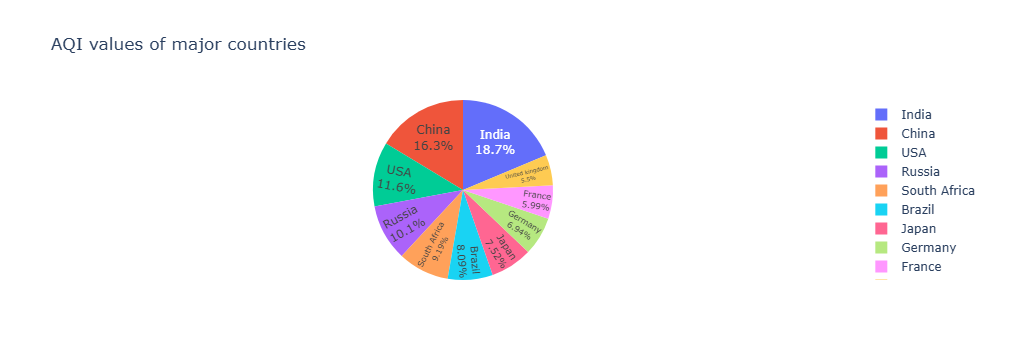

In [44]:
fig=px.pie(major_countries,names="Country",values="AQI Value",title="AQI values of major countries" ,hover_data=["Status"])
fig.update_traces(textposition="inside",textinfo="percent+label")

C:\Users\user\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



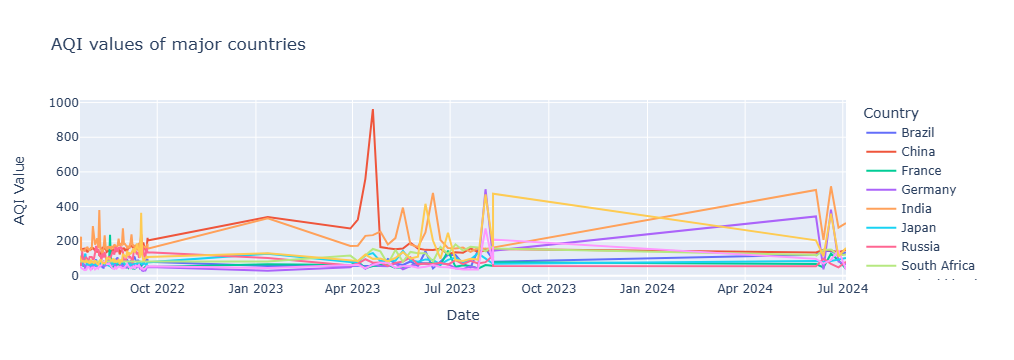

In [48]:
fig=px.line(major_countries,x="Date",y="AQI Value",color="Country",title="AQI values of major countries")
fig.show()

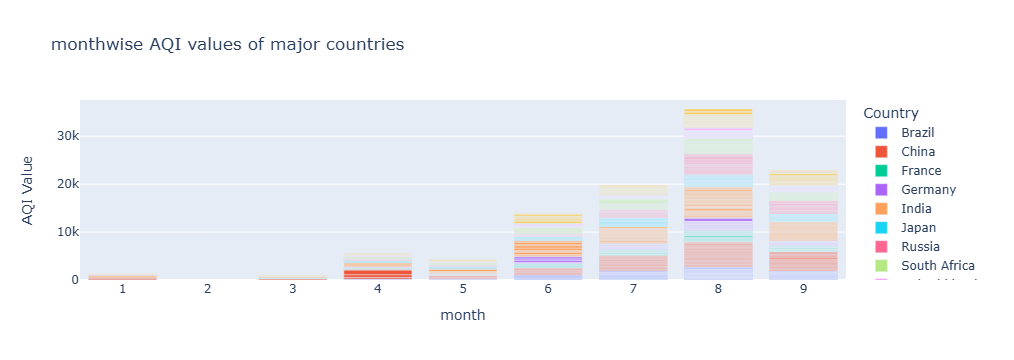

In [50]:
px.bar(major_countries,x="month",y="AQI Value",color="Country",title="monthwise AQI values of major countries")